## Convolución e imágenes  
Voy a ver de implementar la creación y reconstrucción de imágenes simplemente realizando la convolución, primero como filtro (con kernels que acentúen los bordes y eso) y luego con la detección y reconstrucción de imágenes tipo coded aperture.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.ndimage import convolve
from scipy.signal import fftconvolve
from scipy.signal import convolve2d

In [2]:
imagen = np.array([[1, 2, 0],
              [5, 3, 0],
              [0, 0, 0],
              [9, 3, 0]])

kernel = np.array([[1,1],[1,1]])
convolucion = convolve(imagen, kernel, mode='constant', cval=0.0)
fftconvolucion = fftconvolve(imagen, kernel)
convolucion2d = convolve2d(imagen, kernel)
print(convolucion)
print(fftconvolucion)
print(convolucion2d)

[[11  5  0]
 [ 8  3  0]
 [12  3  0]
 [12  3  0]]
[[ 1.00000000e+00  3.00000000e+00  2.00000000e+00 -3.55271368e-16]
 [ 6.00000000e+00  1.10000000e+01  5.00000000e+00  0.00000000e+00]
 [ 5.00000000e+00  8.00000000e+00  3.00000000e+00  7.10542736e-16]
 [ 9.00000000e+00  1.20000000e+01  3.00000000e+00  7.10542736e-16]
 [ 9.00000000e+00  1.20000000e+01  3.00000000e+00  0.00000000e+00]]
[[ 1  3  2  0]
 [ 6 11  5  0]
 [ 5  8  3  0]
 [ 9 12  3  0]
 [ 9 12  3  0]]


Bueno ahi lo que tenemos es que centra el (0,0) del kernel con el (0,0) de la imagen (esquina superior izquierda siempre). Si no le alcanza (a la derecha le va a pasar), rellena con 0. Voy a cambiar cval a 1 a ver qué pasa

In [3]:
imagen = np.array([[1, 2, 0],
              [5, 3, 0],
              [0, 0, 0],
              [9, 3, 0]])

kernel = np.array([[1,1],[1,1]])
convolucion = convolve(imagen, kernel, mode='constant', cval=1.0)
print(convolucion)

[[11  5  2]
 [ 8  3  2]
 [12  3  2]
 [14  5  3]]


Pasa lo mismo que antes pero ahora rellena con unos! Voy a cambiar el origen de las coordenadas. De la documentación:
origin int, optional
Controls the origin of the input signal, which is where the filter is centered to produce the first element of the output. Positive values shift the filter to the right, and negative values shift the filter to the left. Default is 0.

In [4]:
imagen = np.array([[1, 2, 0],
              [5, 3, 0],
              [0, 0, 0],
              [9, 3, 0]])

kernel = np.array([[1,1],[1,1]])
convolucion = convolve(imagen, kernel, mode='constant', cval=0.0, origin = -1)
print(convolucion)

[[ 1  3  2]
 [ 6 11  5]
 [ 5  8  3]
 [ 9 12  3]]


Acá es como si lo centrara el elemento 1,1 del kernel con el 0,0 de la imagen (y rellena todo con ceros). Después se va moviendo. Voy a hacer un kernel de 3x3 a ver que onda, que es el que se usa más. El original ejemplo

In [5]:
import numpy as np
a = np.array([[1, 2, 3, 4],
              [5, 6, 7, 4],
              [0, 0, 0, 7],
              [9, 3, 0, 0]])
k = np.array([[1,0,0],
              [0,0,0],
              [0,0,0]])
from scipy import ndimage
convolucion = convolve(a, k, mode='constant', cval=0.0)
convolucionfft = fftconvolve(a,k, mode = 'same')
convolucion2d = convolve2d(a,k, mode = 'same')
print(convolucion)
print(convolucion2d)
print(convolucionfft)

[[6 7 4 0]
 [0 0 7 0]
 [3 0 0 0]
 [0 0 0 0]]
[[6 7 4 0]
 [0 0 7 0]
 [3 0 0 0]
 [0 0 0 0]]
[[ 6.00000000e+00  7.00000000e+00  4.00000000e+00  0.00000000e+00]
 [ 3.94745964e-16  2.23578633e-16  7.00000000e+00 -2.23578633e-16]
 [ 3.00000000e+00  1.70930017e-16  1.70930017e-16 -1.70930017e-16]
 [ 1.95949093e-17 -2.31375949e-17  4.93432455e-16 -1.74235387e-16]]


Siempre refleja el kernel horizontal y verticalmente. Las tres funciones me dan lo mismo si el modo de convolve2d y fftconvolve es 'same'. Sino, el que tiene por default es full y ahi centra con el elemento de la derecha abajo del kernel reflejado y pasea toooodo el kernel, devolviendo una matrix mas grande que la imagen. 

### Pruebo hacer una convolución con alguna máscara entonces, alguna simple. 

Text(0.5, 1.0, 'Mask')

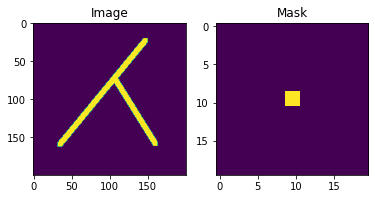

In [3]:
from PIL import Image

#imagen que quiero ver
image = Image.open('exp_pics/lambda_pattern.png')
imagen_array = np.array(image)
plt.subplot(1,2,1)
c = plt.imshow(imagen_array[:,:,3]*0.5) #solo tiene algo la última matriz las otras son 0
plt.title('Image')
#plt.colorbar(c)

#la voy a convolucionar con un pinhole común 
def generate_pinhole_mask(height, length, hole_radius):
    """Generates a mask with a pinhole shape"""
    mask = np.zeros((height, length))
    # Define the lambda shape
    mask[
        int(height * 0.5) - hole_radius : int(height * 0.5) + hole_radius,
        int(length * 0.5) - hole_radius : int(length * 0.5) + hole_radius,
    ] = 1
    return mask

pinhole = generate_pinhole_mask(20,20,1)
plt.subplot(1,2,2)
plt.imshow(pinhole)
plt.title('Mask')


In [18]:
print(pinhole.shape)
print(imagen_array.shape)

(20, 20)
(200, 200, 4)


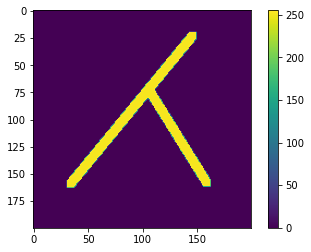

In [4]:
convolucion = convolve(imagen_array[:,:,3], pinhole, mode = 'constant', cval = 0.0)
c = plt.imshow(convolucion)
plt.colorbar(c)

### Le agrego un segundo pinhole 

Text(0.5, 1.0, 'Mask')

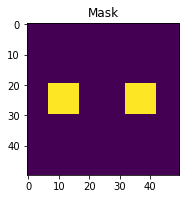

In [5]:
def generate_double_pinhole_mask(height, length, hole_radius):
    """Generates a mask with a pinhole shape"""
    mask = np.zeros((height, length))
    # Define the lambda shape
    mask[
        int(height * 0.5) - hole_radius : int(height * 0.5) + hole_radius,
        int(length * 0.25) - hole_radius : int(length * 0.25) + hole_radius,
    ] = 1
    mask[
        int(height * 0.5) - hole_radius : int(height * 0.5) + hole_radius,
        int(length * 0.75) - hole_radius : int(length * 0.75) + hole_radius,
    ] = 1
    return mask

double_pinhole = generate_double_pinhole_mask(50,50,5)
plt.subplot(1,2,2)
plt.imshow(double_pinhole)
plt.title('Mask')

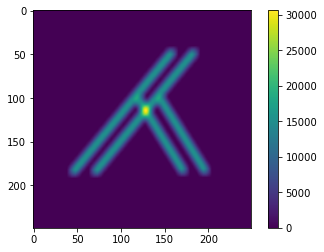

In [6]:
convolucion = convolve(imagen_array[:,:,3]*0.75, double_pinhole, mode = 'constant', cval = 0.0)
convolucion2d = convolve2d(imagen_array[:,:,3]*0.75, double_pinhole)
convolucionfft = fftconvolve(imagen_array[:,:,3]*0.75, double_pinhole)
c = plt.imshow(convolucionfft)
plt.colorbar(c)

Bueno, joya. Se ve que se repite el patron, que estoy empezando a ver las figuras superpuestas, una por cada pinhole. 
Vamos con un patron de pinholes mas complejo y una busqueda de reconstruccion

0.023


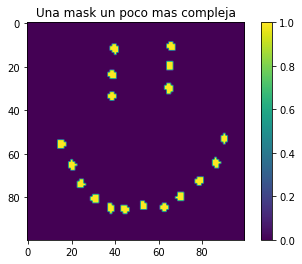

In [29]:
face_pinhole = Image.open('exp_pics/face_pinhole_processed.png')
face_pinhole_array = np.array(face_pinhole)
binary_image_face_mask = (face_pinhole_array > 100).astype(np.uint8) #aca la binarizo
c = plt.imshow(binary_image_face_mask)
plt.colorbar(c)
plt.title('Una mask un poco mas compleja')
transparency = np.sum(np.sum(binary_image_face_mask == 1))/(len(binary_image_face_mask)**2)
print(transparency)

Text(0.5, 1.0, 'Convolution')

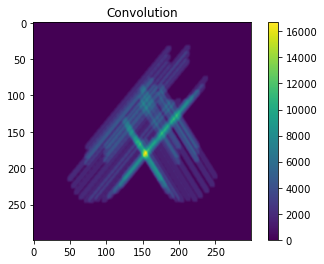

In [30]:
convolucion = convolve(imagen_array[:,:,3]*0.55, binary_image_face_mask, mode = 'constant', cval = 0.0)
convolucion2d = convolve2d(imagen_array[:,:,3]*0.55, binary_image_face_mask)
c = plt.imshow(convolucion2d)
plt.colorbar(c)
plt.title('Convolution')

Ok, no se ve nada, vamos a intentar deconvolucionar

-0.02354145342886387


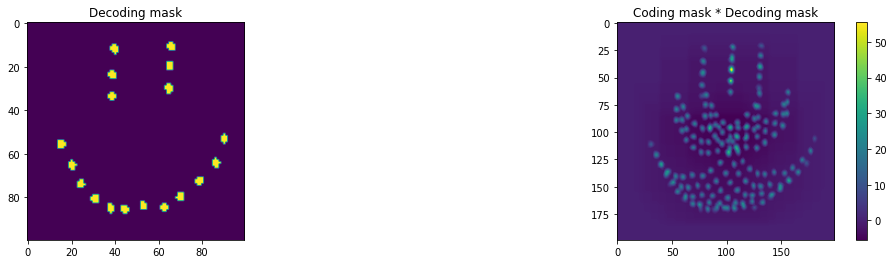

In [9]:
def decoding_mask(coding_mask):
    decoding_matrix = coding_mask.copy()
    transparency = np.sum(np.sum(decoding_matrix == 1))/(len(decoding_matrix)**2)
    return [[transparency/(transparency-1) if element == 0 else element for element in row] for row in decoding_matrix]

decoding_face_mask = decoding_mask(binary_image_face_mask)
print(np.min(decoding_face_mask))

f, ax = plt.subplots(ncols=2, figsize=(18,4))
f.subplots_adjust(wspace=0.3)
ax[0].set_title(r'Decoding mask')
ax[0].imshow(decoding_face_mask)

ax[1].set_title(r'Coding mask * Decoding mask')
#c = ax[1].imshow(convolve(decoding_face_mask, binary_image_face_mask, mode = 'constant'))
c = ax[1].imshow(convolve2d(binary_image_face_mask, decoding_face_mask))
plt.colorbar(c)

Text(0.5, 1.0, 'Reconstructed')

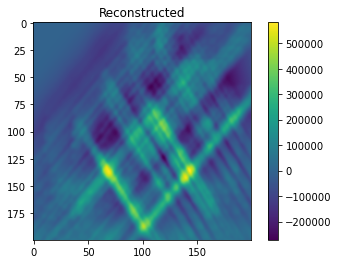

In [10]:
reconstructed_image = convolve(convolucion, decoding_face_mask, mode = 'constant', cval = 0.0)
reconstructed_image_2d = convolve2d(convolucion2d, decoding_face_mask)
c = plt.imshow(reconstructed_image)
plt.colorbar(c)
plt.title('Reconstructed')

Reconstrucción con normalización?!?!?!

230


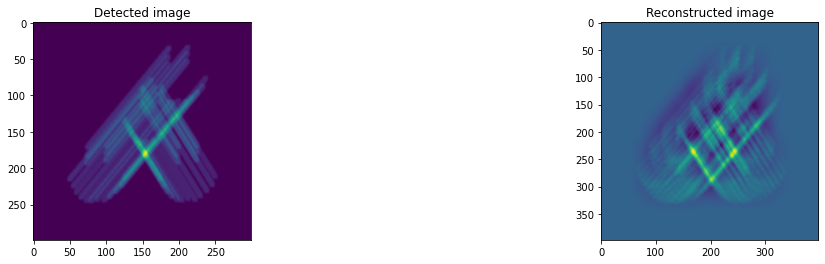

In [13]:
convolucion2d_norm = convolve2d(imagen_array[:,:,3]*0.55, binary_image_face_mask/np.sum(binary_image_face_mask))
reconstructed_image_norm = convolve2d(convolucion2d_norm, decoding_face_mask/np.sum(decoding_face_mask))
print(np.sum(binary_image_face_mask))
f, ax = plt.subplots(ncols=2, figsize=(18,4))
f.subplots_adjust(wspace=0.3)

ax[0].set_title(r'Detected image')
ax[0].imshow(convolucion2d_norm)
ax[1].set_title(r'Reconstructed image')
ax[1].imshow(reconstructed_image_norm)


FOURIER

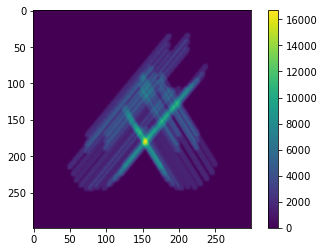

<ipython-input-34-b857813fc333>:39: ComplexWarning: Casting complex values to real discards the imaginary part
  H_inv[r,c] = 1.0 / H[r,c]


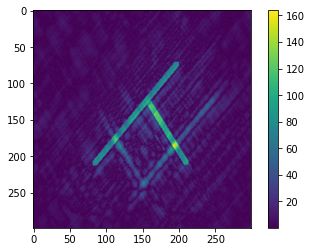

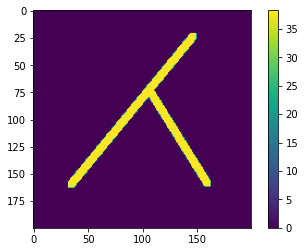

In [34]:
import scipy as sp
### Copy-pasted code from the post.

g = convolucion2d.copy()
h = binary_image_face_mask.copy()

# displayImage(g)
plt.imshow(g)
plt.colorbar()
plt.show()

M = g.shape[0]
N = g.shape[1]

# Pad the filter with 0.
h_pad = np.zeros((M, N))
h_pad[(M-h.shape[0])//2:(M-h.shape[0])//2+h.shape[0],(N-h.shape[1])//2:(N-h.shape[1])//2+h.shape[1]] = h

# Shift the filter so that its center lies at the first element, aka H[0,0].
h_pad = sp.fft.ifftshift(h_pad)

G = sp.fft.fft2(g)
H = sp.fft.fft2(h_pad)

# Set threshold to 0.005.
threshold = 0.0005
threshold = 0.001

# Create array to store the pseudo-inverse filter.
H_inv = np.zeros(G.shape)

for r in range(H.shape[0]):
    for c in range(H.shape[1]):
    	# Compute the magnitude and compare it with threshold.
        mag = np.abs(H[r,c])
        if mag <= threshold:
            H_inv[r,c] = 0
        else:
            H_inv[r,c] = 1.0 / H[r,c]

# Compute the approximated Fourier transform of the original image.
F = G * H_inv

# Inverse the Fourier transform to get the original image.
f = sp.fft.ifft2(F)
f = np.abs(f)

# Some values are larger than 255, so we clamp it to 255.
for r in range(f.shape[0]):
    for c in range(f.shape[1]):
        if f[r,c] > 255:
            f[r,c] = 255
# displayImage(f)
plt.imshow(f)
plt.colorbar()
plt.show()
plt.imshow(img)
plt.colorbar()
plt.show()

En este caso no hay diferencia. Me parece que dado que no es un punto no hay mucho que hacer. Voy a probar la normalización en MURA

No se ve una mierda :) Tan mala es la reconstrucción? Pruebo con los el double pinhole

1.0


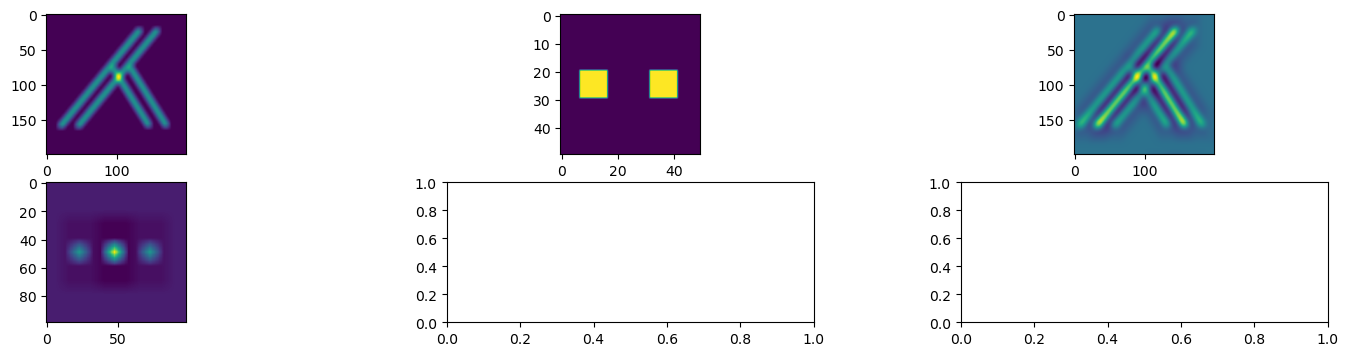

In [57]:
convolucion_double_pinhole = convolve(imagen_array[:,:,3]*0.75, double_pinhole, mode = 'wrap')
f, ax = plt.subplots(ncols=3, nrows = 2, figsize=(18,4))
f.subplots_adjust(wspace=0.4)
a = ax[0,0].imshow(convolucion_double_pinhole)
#lt.colorbar(a)


decoding_double_pinhole = decoding_mask(double_pinhole)
print(np.max(decoding_double_pinhole))
b = ax[0,1].imshow(decoding_double_pinhole)


reconstructed_image = convolve(convolucion_double_pinhole, decoding_double_pinhole, mode = 'wrap')
c = ax[0,2].imshow(reconstructed_image)

d = ax[1,0].imshow(convolve2d(double_pinhole, decoding_double_pinhole))

1.0


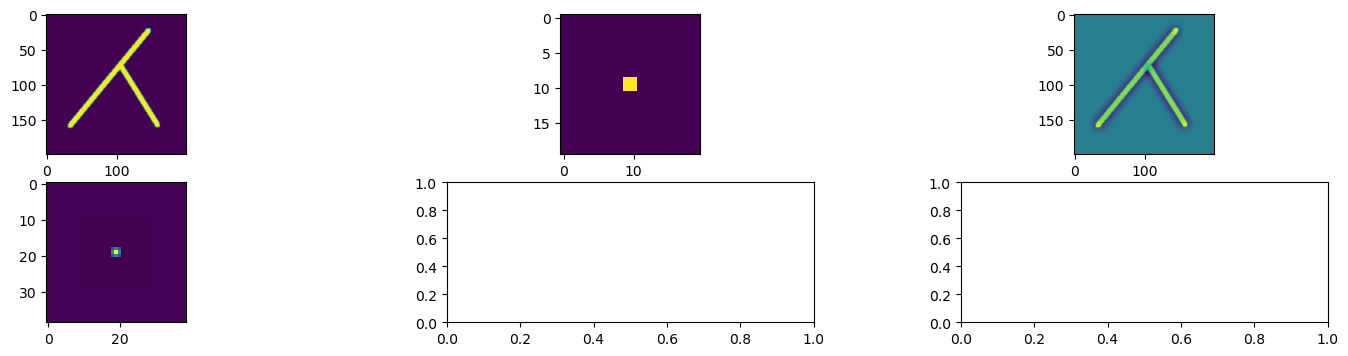

In [58]:
### PRUEBO CON UN UNICO PINHOLE
convolucion_pinhole = convolve(imagen_array[:,:,3]*0.75, pinhole, mode = 'wrap')
f, ax = plt.subplots(ncols=3, nrows = 2, figsize=(18,4))
f.subplots_adjust(wspace=0.4)
a = ax[0,0].imshow(convolucion_pinhole)
#lt.colorbar(a)


decoding_pinhole = decoding_mask(pinhole)
print(np.max(decoding_pinhole))
b = ax[0,1].imshow(decoding_pinhole)


reconstructed_image = convolve(convolucion_pinhole, decoding_pinhole, mode = 'wrap')
c = ax[0,2].imshow(reconstructed_image)

d = ax[1,0].imshow(convolve2d(pinhole, decoding_pinhole))

### MURA - librería codedapertures

Modified Uniformly Redundant Array
----------------------------------
rank:   3
L:      29
tile:   (1, 1)
width:  29
height: 29


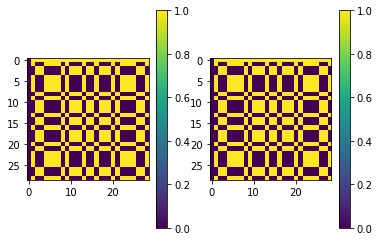

In [5]:
import codedapertures as ca

mura = ca.mura(rank=3, tile=None, center=True)
plt.subplot(1,2,1)
c = plt.imshow(mura.aperture)
plt.colorbar(c)

mura.gen_decoder()
plt.subplot(1,2,2)
d = plt.imshow(mura.decoder)
plt.colorbar(d)

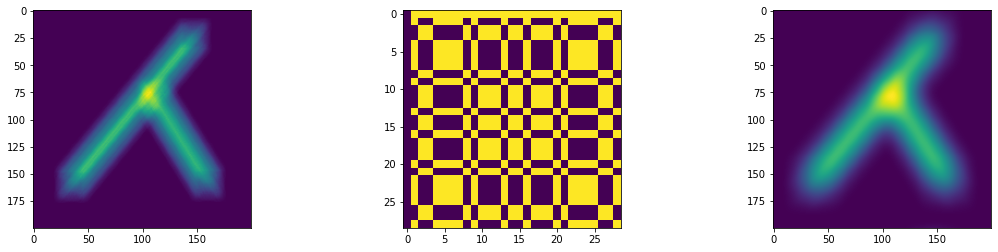

In [6]:
convolucion_mura = convolve(imagen_array[:,:,3]*0.25, mura.aperture, mode = 'wrap')
f, ax = plt.subplots(ncols=3, figsize=(18,4))
f.subplots_adjust(wspace=0.4)
a = ax[0].imshow(convolucion_mura)

b = ax[1].imshow(mura.aperture)

reconstructed_image = convolve(convolucion_mura, mura.decoder, mode = 'wrap')
c = ax[2].imshow(reconstructed_image)

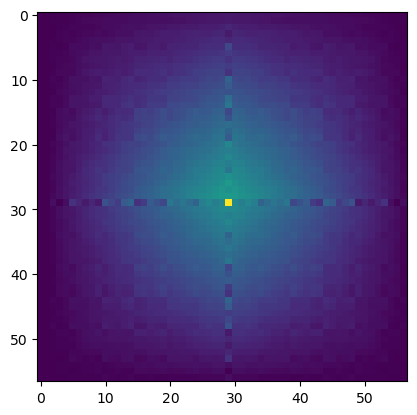

In [63]:
plt.imshow(convolve2d(mura.aperture, mura.decoder))

Lo que me pasa con esto es que me da la sensación de que la imagen reconstruida se ve peor que la original. Tiene sentido porque el mura coder y el decorder son exactamente lo mismo entonces la verdad es que estoy haciendo dos veces el proceso de detección. No le confío a este algoritmo vamos a ver qué pasa si me armo mi propia máscara Mura y decodificador Mura. 

## Busco armar mi propio MURA Decoder

For each MURA mask pattern an inverse decoding pattern 𝐺 can be determined [17]. Correlation
of the decoding and encoding pattern results in a 𝛿-distribution and can be regarded as an inverse
ﬁlter [10]. The decoding pattern 𝐺 in relation to the encoding pattern 𝐻 equals

In practical terms that means all 0 change to -1 and all 1 stay 1 except for the central pixel if a 2×2
mosaicked mask is chosen [15]. Convolving the given detector image with the decoding pattern
and central cropping yields the reconstructed object image.

In [7]:
def decoding_mura(coding_mask):
    decoding_mask = coding_mask.copy()

    k = int(- coding_mask.shape[0]/2)
    l = int(- coding_mask.shape[1]/2)
    print(k,l)

    for i in range(coding_mask.shape[0]):
        for j in range(coding_mask.shape[1]):
            if k + i + l + j == 0:
                decoding_mask[i,j] = 1
            elif coding_mask[i,j] == 0:
                decoding_mask[i,j] = -1
    return decoding_mask

Modified Uniformly Redundant Array
----------------------------------
rank:   13
L:      113
tile:   (1, 1)
width:  113
height: 113
-56 -56


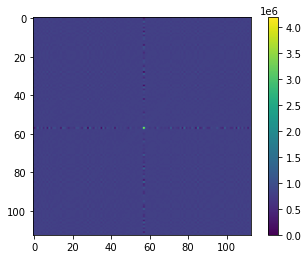

In [8]:
mura = ca.mura(rank=13, tile=None, center=True)
delta = convolve(mura.aperture, decoding_mura(mura.aperture))
C = plt.imshow(delta)
plt.colorbar(c)

Modified Uniformly Redundant Array
----------------------------------
rank:   3
L:      29
tile:   (1, 1)
width:  29
height: 29
29
-14 -14


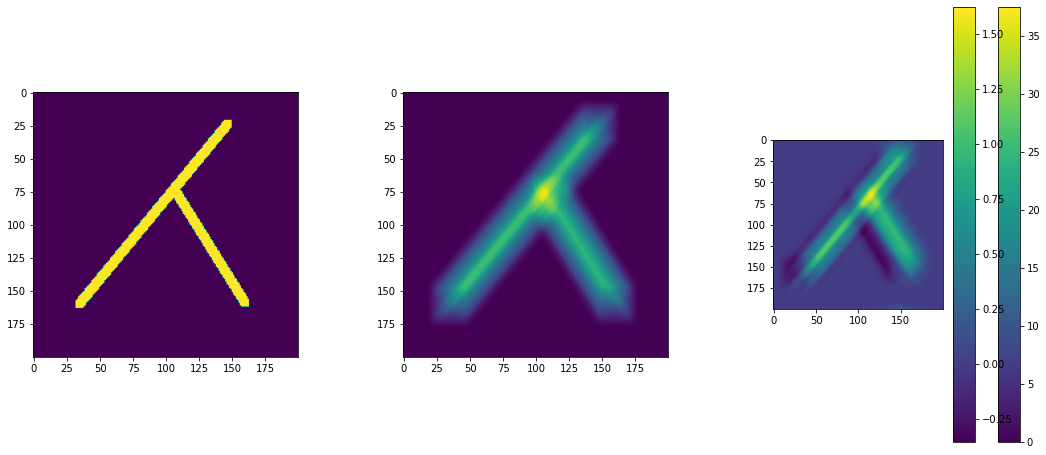

In [10]:

mura = ca.mura(rank=3, tile=None, center=True)

convolucion_mura_lambda = convolve(imagen_array[:,:,3]*0.55, mura.aperture/(len(mura.aperture)**2), mode = 'wrap')
print(len(mura.aperture))
#convolucion_mura_lambda = convolve2d(imagen_array[:,:,3]*0.55, mura.aperture)
f, ax = plt.subplots(ncols=3, figsize=(18,8))
f.subplots_adjust(wspace=0.4)

ax[0].imshow(imagen_array[:,:,3]*0.25)
b = ax[1].imshow(convolucion_mura_lambda)
plt.colorbar(b)

decoding_mask = decoding_mura(mura.aperture)
reconstructed_image = convolve(convolucion_mura_lambda, decoding_mask/(len(decoding_mask)**2), mode = 'wrap')
#reconstructed_image = convolve2d(convolucion_mura_lambda, decoding_mask)

c = ax[2].imshow(reconstructed_image)
plt.colorbar(c)
#ax[2].imshow(convolve2d(imagen_array[:,:,3]*0.25, delta))

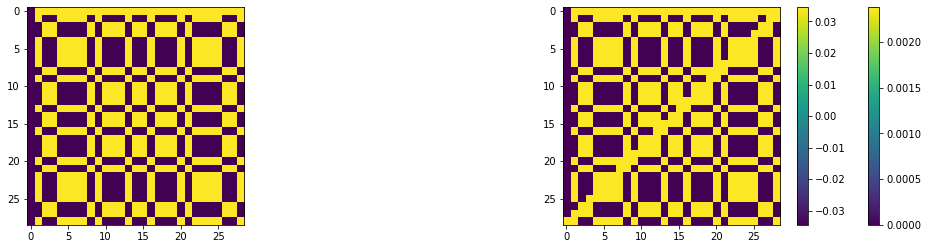

In [19]:
f, ax = plt.subplots(ncols=2, figsize=(18,4))
f.subplots_adjust(wspace=0.4)
a = ax[0].imshow(mura.aperture/np.sum(mura.aperture))
plt.colorbar(a)
b = ax[1].imshow(decoding_mask/np.sum(decoding_mask))
plt.colorbar(b)

Bueno, la verdad es que la convolución entre el patrón de Mura y su decoder es bastante una delta. De hecho se reconstruye bastante bien pero hay un fondo desagradable que no termino de entender. Voy entonces a seguir un poco más lo que hacen en el paper Coded Aperture imaging for fluorescent x-rays, y buscar la matriz que deconvoluciones (incluso en el caso MURA) con transformada de Fourier. 

Modified Uniformly Redundant Array
----------------------------------
rank:   10
L:      97
tile:   (1, 1)
width:  97
height: 97


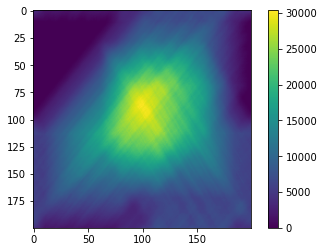

<ipython-input-28-944fab90e33d>:46: ComplexWarning: Casting complex values to real discards the imaginary part
  H_inv[r,c] = 1.0 / H[r,c]


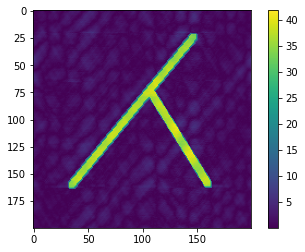

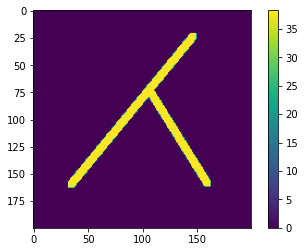

In [28]:
import scipy as sp
mura = ca.mura(rank=10, tile=None, center=True)
### Copy-pasted code from the post.

# Input image.
#IMAGE_NAME = 'exp_pics/face_pinhole_exp.png'
#img = cv2.imread(IMAGE_NAME, 0)
# Invert image.
img = imagen_array[:,:,3]*0.55
#img = 255 - img
h = mura.aperture

# Apply onto the image.
g = convolve(img, h, mode='wrap')
# displayImage(g)
plt.imshow(g)
plt.colorbar()
plt.show()

M = g.shape[0]
N = g.shape[1]

# Pad the filter with 0.
h_pad = np.zeros((M, N))
h_pad[(M-h.shape[0])//2:(M-h.shape[0])//2+h.shape[0],(N-h.shape[1])//2:(N-h.shape[1])//2+h.shape[1]] = h

# Shift the filter so that its center lies at the first element, aka H[0,0].
h_pad = sp.fft.ifftshift(h_pad)

G = sp.fft.fft2(g)
H = sp.fft.fft2(h_pad)

# Set threshold to 0.005.
threshold = 0.0005

# Create array to store the pseudo-inverse filter.
H_inv = np.zeros(G.shape)

for r in range(H.shape[0]):
    for c in range(H.shape[1]):
    	# Compute the magnitude and compare it with threshold.
        mag = np.abs(H[r,c])
        if mag <= threshold:
            H_inv[r,c] = 0
        else:
            H_inv[r,c] = 1.0 / H[r,c]

# Compute the approximated Fourier transform of the original image.
F = G * H_inv

# Inverse the Fourier transform to get the original image.
f = sp.fft.ifft2(F)
f = np.abs(f)

# Some values are larger than 255, so we clamp it to 255.
for r in range(f.shape[0]):
    for c in range(f.shape[1]):
        if f[r,c] > 255:
            f[r,c] = 255
# displayImage(f)
plt.imshow(f)
plt.colorbar()
plt.show()
plt.imshow(img)
plt.colorbar()
plt.show()
